# Data description & Problem statement: 
This data set is collected from recordings of 30 human subjects captured via smartphones enabled with embedded inertial sensors.
In this project, we calculate a model by which a smartphone can detect its owner’s activity precisely. For the dataset, 30 people were used to perform 6 different activities. Each of them was wearing a Samsung Galaxy SII on their waist. Using the smartphone’s embedded sensors (the accelerometer and the gyroscope), the user’s speed and acceleration were measured in 3-axial directions. We use the sensor’s data to predict user’s activity.

* Dataset is imbalanced. The data has 10299 rows and 561 columns.
* This is a Multiclass-classification problem. 

# Workflow:
- Load the dataset, and define the required functions (e.g. for detecting the outliers)
- Data Cleaning/Wrangling: Manipulate outliers, missing data or duplicate values, Encode categorical variables, etc.
- Split data into training & test parts (utilize the training part for training & hyperparameter tuning of model, and test part for the final evaluation of model)
   #  Model Training:
- Build an Random Forest model, and evaluate it via C-V approach

   # Model Evaluation: 
- Evaluate the RF model with optimized hyperparameters on Test Dataset, by calculating:
     - f1_weighted
     - Confusion matrix

In [1]:
import sklearn
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_X=pd.read_csv('C:/Users/rhash/Documents/Datasets/Human activity recognition/UCI HAR Dataset/train/X_train.txt' 
                                ,delim_whitespace=True, header = None) 

df_y=pd.read_csv('C:/Users/rhash/Documents/Datasets/Human activity recognition/UCI HAR Dataset/train/y_train.txt' 
                                ,delim_whitespace=True, header = None, names=['Label']) 

df = pd.concat([df_y, df_X], axis=1)  

# To Shuffle the data:
np.random.seed(42)
df=df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

df.head(3)

,Label,0,1,2,3,4,5,6,7,8,...,551,552,553,554,555,556,557,558,559,560
0,3,0.283203,-0.047024,-0.168986,0.384949,0.176898,-0.310332,0.381757,0.122611,-0.332984,...,0.454181,-0.730593,-0.932568,-0.034924,0.558036,0.258975,-0.854858,-0.784330,0.222960,-0.066506
1,3,0.256904,-0.036623,-0.133856,0.201409,-0.154142,0.344183,0.092771,-0.182114,0.291899,...,0.190745,-0.032958,-0.338095,0.017986,-0.475545,0.942947,-0.567147,-0.665156,0.178975,0.243362
2,1,0.291316,-0.001065,-0.072461,-0.336609,-0.279162,-0.303323,-0.381421,-0.253026,-0.337381,...,0.299767,-0.351997,-0.698254,-0.044663,-0.551806,-0.680774,0.161405,-0.857202,0.192929,0.046716


In [3]:
X=df.drop('Label', axis=1)
y=df['Label']

In [4]:
# We initially devide data into training & test folds:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify = y)

In [5]:
# Build and fit the RF model:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(max_features=560, n_estimators=100, max_depth=30,  random_state=42, class_weight='balanced')
model = RF.fit(X_train, y_train)

Confusion matrix, without normalization
[[296   5   6   0   0   0]
 [  2 260   6   0   0   0]
 [  5   4 237   0   0   0]
 [  0   0   0 299  23   0]
 [  0   0   0  18 325   0]
 [  0   0   0   0   0 352]]
Normalized confusion matrix
[[0.96 0.02 0.02 0.   0.   0.  ]
 [0.01 0.97 0.02 0.   0.   0.  ]
 [0.02 0.02 0.96 0.   0.   0.  ]
 [0.   0.   0.   0.93 0.07 0.  ]
 [0.   0.   0.   0.05 0.95 0.  ]
 [0.   0.   0.   0.   0.   1.  ]]


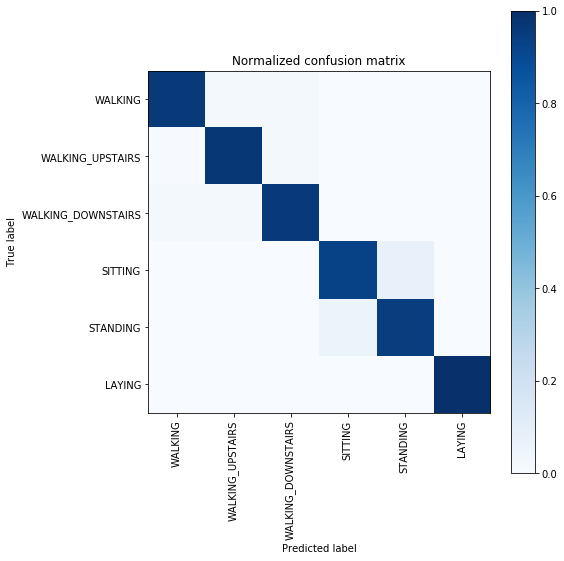

In [8]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

names = ["WALKING", "WALKING_UPSTAIRS", "WALKING_DOWNSTAIRS", "SITTING", "STANDING", "LAYING"]

# Compute confusion matrix
cm = confusion_matrix(y_test, model.predict(X_test))
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)

# Normalize the confusion matrix by row (i.e by the number of samples in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)

plot_confusion_matrix(cm_normalized, names, title='Normalized confusion matrix')

In [9]:
# Classification report:
report=classification_report(y_test, model.predict(X_test))
print(report)

             precision    recall  f1-score   support

          1       0.98      0.96      0.97       307
          2       0.97      0.97      0.97       268
          3       0.95      0.96      0.96       246
          4       0.94      0.93      0.94       322
          5       0.93      0.95      0.94       343
          6       1.00      1.00      1.00       352

avg / total       0.96      0.96      0.96      1838

